Model Accuracy: 0.75


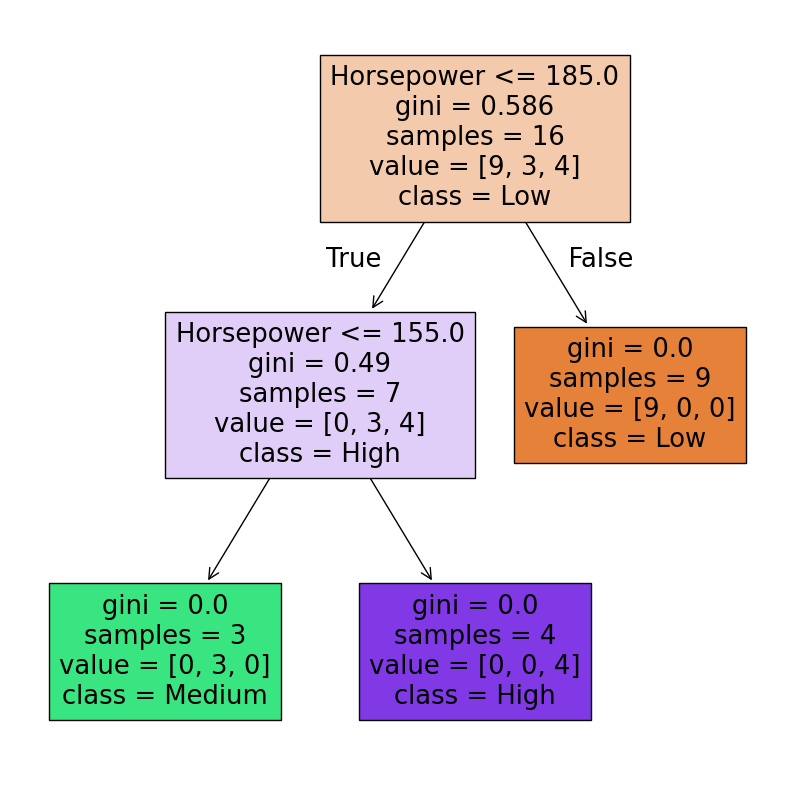

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Data creation
# Here, we simulate a dataset using pandas DataFrame.
# We create a simple dataset of cars with features like horsepower, weight, fuel type,
# and their respective price categories which we aim to predict using our model.
data = {
    'Horsepower': [130, 250, 190, 300, 210, 110, 250, 170, 150, 220, 180, 290, 130, 230, 160, 200, 210, 120, 260, 170],
    'Weight': [2500, 3200, 2700, 3400, 2900, 2600, 3100, 2800, 2400, 3000, 2750, 3200, 2650, 2980, 2800, 3100, 2600, 2500, 3050, 2700],
    'Fuel_Type': ['Petrol', 'Diesel', 'Electric', 'Diesel', 'Petrol', 'Electric', 'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Electric', 'Petrol', 'Petrol', 'Diesel', 'Electric', 'Petrol', 'Diesel', 'Electric', 'Petrol', 'Diesel'],
    'Price_Category': ['Medium', 'High', 'High', 'High', 'High', 'Low', 'High', 'Medium', 'Low', 'High', 'Medium', 'High', 'Low', 'High', 'Medium', 'High', 'High', 'Low', 'High', 'Medium']
}
df = pd.DataFrame(data)

# Data preprocessing
# We use LabelEncoder to convert the categorical data (Fuel_Type and Price_Category) into numerical format.
# This transformation is necessary as scikit-learn's algorithms do not handle categorical data directly.
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Price_Category'] = label_encoder.fit_transform(df['Price_Category'])

# Data splitting
# We split our dataset into training and testing sets. 80% of the data is used for training the model,
# and 20% is used for testing. This split helps in validating the performance of the model on unseen data.
X = df[['Horsepower', 'Weight', 'Fuel_Type']]
y = df['Price_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building
# We use DecisionTreeClassifier to create and train our model. This classifier is suitable for multi-class classification.
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Model evaluation
# We evaluate the model using the testing set and print the accuracy to understand how well our model performs.
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Decision tree visualization
# Visualizing the decision tree helps in understanding how decisions are being made based on the features.
# We use plot_tree function which provides a visual representation of the decision tree logic.
plt.figure(figsize=(10,10))
plot_tree(model, filled=True, feature_names=['Horsepower', 'Weight', 'Fuel_Type'], class_names=['Low', 'Medium', 'High'])
plt.show()
